<a href="https://colab.research.google.com/github/yuseongil034/yuseongil/blob/main/0717_yolov8_%EC%98%81%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install ultralytics yt-dlp opencv-python

import cv2
import os
from ultralytics import YOLO
import yt_dlp
from IPython.display import Video, display

# COCO 사전 훈련된 YOLOv8n 모델 로드
model = YOLO("yolov8n.pt")

# 모델 정보 표시 (선택사항)
model.info()

# COCO8 예제 데이터셋으로 10 에포크 훈련
results = model.train(data="coco8.yaml", epochs=10, imgsz=640)

# 유튜브 영상 다운로드 함수
def download_youtube_video(url, output_path='./'):
    ydl_opts = {
        'format': 'best[height<=720]',  # 720p 이하 품질로 다운로드
        'outtmpl': os.path.join(output_path, '%(title)s.%(ext)s'),
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(url, download=True)
        filename = ydl.prepare_filename(info)
        return filename

# 유튜브 URL 입력
youtube_url = input("유튜브 URL을 입력하세요: ")

# 유튜브 영상 다운로드
print("유튜브 영상을 다운로드 중...")
video_path = download_youtube_video(youtube_url)
print(f"다운로드 완료: {video_path}")

# YOLO 모델로 영상에서 객체 탐지 실행 (영상 전체 처리)
print("객체 탐지 실행 중...")
results = model(video_path, save=True, conf=0.5, show=False)

# 결과 영상 경로
output_video_path = "runs/detect/predict/{}".format(os.path.basename(video_path))

print(f"결과 영상이 저장되었습니다: {output_video_path}")

# 결과 영상 재생 (Colab에서)
if os.path.exists(output_video_path):
    print("결과 영상 재생:")
    display(Video(output_video_path, width=800))

    # 영상 다운로드 기능 (Google Colab용)
    print(f"\n=== 영상 저장 완료 ===")
    print(f"저장 위치: {output_video_path}")

    try:
        from google.colab import files

        # 사용자가 다운로드하기 쉬운 이름으로 복사
        final_output_name = "yolo_detection_result.mp4"
        import shutil
        shutil.copy2(output_video_path, final_output_name)

        print(f"다운로드용 파일명: {final_output_name}")
        print("아래 버튼을 클릭하여 결과 영상을 다운로드하세요:")
        files.download(final_output_name)

    except ImportError:
        print("로컬 환경에서 실행 중입니다.")
        print(f"결과 영상이 다음 위치에 저장되었습니다: {output_video_path}")

else:
    print("결과 영상을 찾을 수 없습니다. runs/detect/ 폴더를 확인해주세요.")

# 전체 영상에서 탐지된 객체 통계
print("\n=== 전체 영상 탐지 통계 ===")
all_detections = {}
total_frames = 0

for i, result in enumerate(results):
    total_frames += 1
    if hasattr(result, 'boxes') and result.boxes is not None:
        for box in result.boxes:
            cls = int(box.cls[0])
            class_name = model.names[cls]
            if class_name not in all_detections:
                all_detections[class_name] = 0
            all_detections[class_name] += 1

print(f"총 처리된 프레임: {total_frames}")
print("탐지된 객체별 총 개수:")
for obj_name, count in sorted(all_detections.items()):
    print(f"  - {obj_name}: {count}회 탐지")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

100%|██████████| 6.25M/6.25M [00:00<00:00, 360MB/s]


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

100%|██████████| 433k/433k [00:00<00:00, 68.3MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 4343.37file/s]

Dataset download success ✅ (0.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 118MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 129 layers, 3,157,200 parameters, 3,157,184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 352MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1129.5±379.7 MB/s, size: 50.0 KB)


train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1096.48it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 358.0±230.3 MB/s, size: 54.0 KB)


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1222.21it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.598G     0.9689      2.167      1.332         13        640: 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

                   all          4         17      0.616      0.875      0.888      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/10     0.629G      1.057      2.664      1.362         13        640: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all          4         17      0.593      0.897      0.888       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.633G     0.9198      1.931      1.208         13        640: 100%|██████████| 1/1 [00:00<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          4         17      0.598      0.882      0.888      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.641G      0.984      2.543      1.327         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.16it/s]


                   all          4         17      0.551      0.838      0.874      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.645G      1.063      2.402      1.361         13        640: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          4         17      0.619      0.833      0.874      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.652G     0.9205      2.671      1.382         13        640: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all          4         17      0.681      0.833       0.88      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.689G      1.248      2.765      1.389         13        640: 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          4         17      0.717       0.75      0.893      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.709G      1.039      2.115      1.366         13        640: 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all          4         17      0.681       0.75      0.893       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.727G     0.8688      1.565      1.135         13        640: 100%|██████████| 1/1 [00:00<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all          4         17      0.663       0.75      0.884      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.746G     0.9463      1.978      1.347         13        640: 100%|██████████| 1/1 [00:00<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.42it/s]

                   all          4         17      0.703       0.75      0.812      0.602



10 epochs completed in 0.002 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 24.07it/s]


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
video 1/1 (frame 342/5318) /content/서울의 홍대 홍익대 입구 근처의 최근 모습을 감상하세요 Travel destinations in Korea 韓国の目的地 4K.mp4: 384x640 1 person, 3 cars, 1 traffic light, 6.6ms
video 1/1 (frame 343/5318) /content/서울의 홍대 홍익대 입구 근처의 최근 모습을 감상하세요 Travel destinations in Korea 韓国の目的地 4K.mp4: 384x640 3 persons, 3 cars, 1 traffic light, 6.5ms
video 1/1 (frame 344/5318) /content/서울의 홍대 홍익대 입구 근처의 최근 모습을 감상하세요 Travel destinations in Korea 韓国の目的地 4K.mp4: 384x640 1 person, 3 cars, 1 traffic light, 6.4ms
video 1/1 (frame 345/5318) /content/서울의 홍대 홍익대 입구 근처의 최근 모습을 감상하세요 Travel destinations in Korea 韓国の目的地 4K.mp4: 384x640 2 persons, 3 cars, 2 traffic lights, 7.4ms
video 1/1 (frame 346/5318) /content/서울의 홍대 홍익대 입구 근처의 최근 모습을 감상하세요 Travel destinations in Korea 韓国の目的地 4K.mp4: 384x640 1 person, 3 cars, 2 traffic lights, 7.6ms
video 1/1 (frame 347/5318) /content/서울의 홍대 홍익대 입구 근처의 최근 모습을 감상하세요 Travel destinations in Korea 韓国の目的地 4K.mp4: 384x640 3 persons, 3 cars, 1 traffic light, 7.6ms

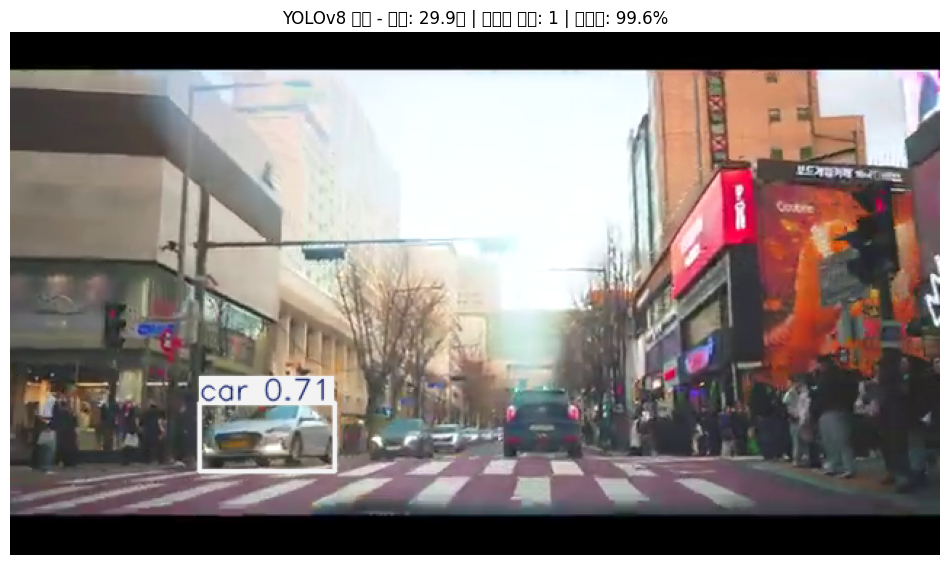

⏳ 진행률: 99.6% | 현재 시간: 29.9초 | 처리된 프레임: 180 | 경과 시간: 8.4초
✅ 영상 추론 완료!
📊 처리 구간: 0.0초 ~ 30.0초 (30.0초)
📊 총 처리 시간: 8.37초
📊 처리된 프레임: 180
💾 저장된 파일: yolov8_qlry.mp4
📁 파일 크기: 4.25 MB
🗑️ 임시 파일 정리 완료

👋 프로그램 종료


In [4]:
import cv2
import yt_dlp
import tempfile
import os
import time
import matplotlib.pyplot as plt
from pathlib import Path

# Jupyter 환경에서만 clear_output 사용
try:
    from IPython.display import clear_output
    JUPYTER_ENV = True
except ImportError:
    JUPYTER_ENV = False
    def clear_output(wait=True):
        pass

# YOLO 모델 전역 변수로 선언
model = None

def play_and_save_youtube_with_yolo(youtube_url, skip_frames=5, output_filename="output_with_yolo.mp4",
                                   start_time=0, end_time=None, max_duration=10,
                                   model_path="yolov8n.pt", confidence=0.5):
    """
    YouTube 영상을 다운로드하고 YOLO 객체 탐지를 적용하여 저장

    Args:
        youtube_url (str): 유튜브 영상 URL
        skip_frames (int): 건너뛸 프레임 수 (성능 최적화용)
        output_filename (str): 출력 파일명
        start_time (int/float): 시작 시간(초) - 기본값 0
        end_time (int/float): 종료 시간(초) - None이면 start_time + max_duration
        max_duration (int): 최대 처리 시간(초) - end_time이 None일 때만 사용
        model_path (str): YOLO 모델 경로
        confidence (float): 탐지 신뢰도 임계값
    """

    # YOLO 모델 로드
    global model
    if model is None:
        try:
            from ultralytics import YOLO
            model = YOLO(model_path)
            print(f"🤖 YOLO 모델 로드 완료: {model_path}")
        except Exception as e:
            print(f"❌ YOLO 모델 로드 실패: {e}")
            print("💡 pip install ultralytics 명령으로 YOLO를 설치하세요.")
            return

    # 출력 디렉토리 생성
    output_path = Path(output_filename)
    output_path.parent.mkdir(parents=True, exist_ok=True)

    ydl_opts = {
        'format': 'mp4/best[height<=480]',
        'outtmpl': os.path.join(tempfile.gettempdir(), 'temp_video.%(ext)s'),
        'quiet': True,
    }

    temp_video_path = None
    cap = None
    out = None

    try:
        # 유튜브 영상 다운로드
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            print("⬇️ 유튜브 영상 다운로드 중...")
            info = ydl.extract_info(youtube_url, download=True)
            temp_video_path = ydl.prepare_filename(info)
            print(f"🎥 영상 제목: {info['title']}")
            print(f"📊 영상 길이: {info.get('duration', 'Unknown')}초")

        # 비디오 캡처 초기화
        cap = cv2.VideoCapture(temp_video_path)
        if not cap.isOpened():
            raise ValueError("영상 파일을 열 수 없습니다.")

        # 비디오 속성 가져오기
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        video_duration = total_frames / fps

        # 시간 범위 설정 및 검증
        if end_time is None:
            end_time = min(start_time + max_duration, video_duration)

        # 시간 범위 검증
        start_time = max(0, start_time)  # 0보다 작으면 0으로
        end_time = min(end_time, video_duration)  # 영상 길이보다 크면 영상 길이로

        if start_time >= end_time:
            print(f"❌ 오류: 시작 시간({start_time}초)이 종료 시간({end_time}초)보다 큽니다.")
            print(f"📊 영상 길이: {video_duration:.2f}초")
            return

        # 프레임 번호로 변환
        start_frame = int(start_time * fps)
        end_frame = int(end_time * fps)
        process_duration = end_time - start_time

        print(f"📹 영상 정보: {frame_width}x{frame_height}, {fps:.2f} FPS")
        print(f"⏱ 전체 영상 길이: {video_duration:.2f}초 ({total_frames} 프레임)")
        print(f"🎯 처리 구간: {start_time:.1f}초 ~ {end_time:.1f}초 ({process_duration:.1f}초)")
        print(f"🔢 처리 프레임 범위: {start_frame} ~ {end_frame}")

        # 시작 프레임으로 이동
        if start_frame > 0:
            cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
            # 실제로 이동했는지 확인
            actual_pos = cap.get(cv2.CAP_PROP_POS_FRAMES)
            if abs(actual_pos - start_frame) > 1:
                print(f"⚠️ 경고: 정확한 시작 프레임 이동 실패 (목표: {start_frame}, 실제: {actual_pos})")
                start_frame = int(actual_pos)


        # 비디오 라이터 초기화
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        output_fps = fps / skip_frames
        out = cv2.VideoWriter(output_filename, fourcc, output_fps, (frame_width, frame_height))

        if not out.isOpened():
            raise ValueError("출력 비디오 파일을 생성할 수 없습니다.")

        frame_num = start_frame
        processed_frames = 0
        start_time_processing = time.time()

        print("🔄 YOLO 추론 시작...")

        while True:
            ret, frame = cap.read()
            if not ret or frame_num >= end_frame:
                break

            # 프레임 건너뛰기
            if (frame_num - start_frame) % skip_frames == 0:
                try:
                    # YOLO 추론
                    results = model.predict(frame, imgsz=640, verbose=False, conf=confidence)[0]
                    annotated_frame = results.plot()

                    # 비디오에 프레임 저장
                    out.write(annotated_frame)
                    processed_frames += 1

                    # 진행률 표시
                    progress = ((frame_num - start_frame) / (end_frame - start_frame)) * 100
                    current_time = frame_num / fps
                    detected_objects = len(results.boxes) if results.boxes is not None else 0

                    # 실시간 시각화 (Jupyter 환경에서만)
                    if JUPYTER_ENV and processed_frames % 10 == 0:  # 10프레임마다만 표시
                        clear_output(wait=True)
                        plt.figure(figsize=(12, 8))
                        plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
                        plt.title(f"YOLOv8 추론 - 시간: {current_time:.1f}초 | 탐지된 객체: {detected_objects} | 진행률: {progress:.1f}%")
                        plt.axis('off')
                        plt.show()

                    # 간단한 콘솔 진행률 표시
                    if processed_frames % 30 == 0:
                        elapsed_time = time.time() - start_time_processing
                        print(f"⏳ 진행률: {progress:.1f}% | 현재 시간: {current_time:.1f}초 | 처리된 프레임: {processed_frames} | 경과 시간: {elapsed_time:.1f}초")

                except Exception as e:
                    print(f"⚠️ 프레임 {frame_num} 처리 중 오류: {e}")
                    continue

            frame_num += 1

        total_time = time.time() - start_time_processing
        print(f"✅ 영상 추론 완료!")
        print(f"📊 처리 구간: {start_time:.1f}초 ~ {end_time:.1f}초 ({process_duration:.1f}초)")
        print(f"📊 총 처리 시간: {total_time:.2f}초")
        print(f"📊 처리된 프레임: {processed_frames}")
        print(f"💾 저장된 파일: {output_filename}")

        # 파일 크기 확인
        if os.path.exists(output_filename):
            file_size = os.path.getsize(output_filename) / (1024*1024)  # MB
            print(f"📁 파일 크기: {file_size:.2f} MB")


    except Exception as e:
        print(f"❌ 오류 발생: {e}")

    finally:
        # 리소스 정리
        if cap:
            cap.release()
        if out:
            out.release()
        if temp_video_path and os.path.exists(temp_video_path):
            try:
                os.remove(temp_video_path)
                print("🗑️ 임시 파일 정리 완료")
            except:
                pass

        # OpenCV 창 정리 - Colab에서는 필요 없음
        # cv2.destroyAllWindows()


def get_video_info(youtube_url):
    """
    유튜브 영상의 기본 정보를 가져오는 함수

    Args:
        youtube_url (str): 유튜브 영상 URL

    Returns:
        dict: 영상 정보 (제목, 길이, 업로더 등)
    """
    ydl_opts = {
        'quiet': True,
        'no_warnings': True,
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(youtube_url, download=False)
            return {
                'title': info.get('title', 'Unknown'),
                'duration': info.get('duration', 0),
                'uploader': info.get('uploader', 'Unknown'),
                'view_count': info.get('view_count', 0),
                'upload_date': info.get('upload_date', 'Unknown'),
                'description': info.get('description', '')[:200] + '...' if info.get('description') else ''
            }
    except Exception as e:
        print(f"❌ 영상 정보 가져오기 실패: {e}")
        return None

def format_time(seconds):
    """초를 MM:SS 형식으로 변환"""
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes:02d}:{seconds:02d}"

def interactive_time_selection(youtube_url):
    """
    대화형 시간 선택 인터페이스

    Args:
        youtube_url (str): 유튜브 영상 URL

    Returns:
        tuple: (start_time, end_time)
    """
    print("\n" + "="*50)
    print("🎬 영상 정보 가져오는 중...")
    print("="*50)

    video_info = get_video_info(youtube_url)
    if not video_info:
        return None, None

    duration = video_info['duration']
    if duration <= 0:
        print("❌ 영상 길이를 확인할 수 없습니다.")
        return None, None

    print(f"📹 제목: {video_info['title']}")
    print(f"⏱ 총 길이: {format_time(duration)} ({duration}초)")
    print(f"👤 업로더: {video_info['uploader']}")
    print(f"📝 설명: {video_info['description']}")

    print("\n" + "="*50)
    print("⏰ 처리할 구간을 선택하세요")
    print("="*50)

    while True:
        try:
            # 시작 시간 입력
            start_input = input(f"🎬 시작 시간 입력 (0~{duration}초 또는 MM:SS 형식): ").strip()
            if not start_input:
                start_time = 0
            elif ':' in start_input:
                parts = start_input.split(':')
                if len(parts) == 2:
                    minutes, seconds = map(int, parts)
                    start_time = minutes * 60 + seconds
                else:
                    raise ValueError("잘못된 시간 형식")
            else:
                start_time = float(start_input)

            if start_time < 0 or start_time >= duration:
                print(f"❌ 시작 시간은 0~{duration-1}초 사이여야 합니다.")
                continue

            # 종료 시간 입력
            max_end_time = duration
            end_input = input(f"🏁 종료 시간 입력 ({start_time+1}~{max_end_time}초 또는 MM:SS 형식, 엔터=끝까지): ").strip()
            if not end_input:
                end_time = duration
            elif ':' in end_input:
                parts = end_input.split(':')
                if len(parts) == 2:
                    minutes, seconds = map(int, parts)
                    end_time = minutes * 60 + seconds
                else:
                    raise ValueError("잘못된 시간 형식")
            else:
                end_time = float(end_input)

            if end_time <= start_time or end_time > duration:
                print(f"❌ 종료 시간은 {start_time+1}~{duration}초 사이여야 합니다.")
                continue

            # 확인
            process_duration = end_time - start_time
            print(f"\n✅ 선택된 구간: {format_time(start_time)} ~ {format_time(end_time)} ({process_duration:.1f}초)")

            confirm = input("이 구간으로 처리하시겠습니까? (y/n): ").strip().lower()
            if confirm in ['y', 'yes', '예', '']:
                return start_time, end_time

        except ValueError as e:
            print(f"❌ 올바른 시간 형식을 입력하세요. (예: 30 또는 1:30) - {e}")
        except KeyboardInterrupt:
            print("\n🚫 취소되었습니다.")
            return None, None

def batch_process_youtube_videos(video_urls, **kwargs):
    """
    여러 유튜브 영상을 배치로 처리

    Args:
        video_urls (list): 유튜브 URL 리스트
        **kwargs: play_and_save_youtube_with_yolo 함수의 매개변수
    """
    for i, url in enumerate(video_urls):
        print(f"\n{'='*50}")
        print(f"📹 영상 {i+1}/{len(video_urls)} 처리 중...")
        print(f"{'='*50}")

        # 자동으로 파일명 생성
        output_filename = kwargs.get('output_filename', f"output_video_{i+1}_with_yolo.mp4")
        if len(video_urls) > 1:
            base_name = output_filename.rsplit('.', 1)[0]
            ext = output_filename.rsplit('.', 1)[1]
            output_filename = f"{base_name}_{i+1}.{ext}"

        kwargs['output_filename'] = output_filename
        play_and_save_youtube_with_yolo(url, **kwargs)

# 사용 예시
if __name__ == "__main__":
    print("🎥 YouTube YOLO 객체 탐지 프로그램")
    print("="*50)

    try:
        # 유튜브 URL 입력
        youtube_url = input("📋 유튜브 영상 URL을 입력하세요: ").strip()
        if not youtube_url:
            print("❌ URL을 입력해주세요.")
            exit()

        # 처리 모드 선택
        mode = input("\n🔧 처리 모드를 선택하세요 (1: 자동, 2: 수동 시간 선택): ").strip()

        if mode == "2":
            # 수동 시간 선택 모드
            start_time, end_time = interactive_time_selection(youtube_url)
            if start_time is None:
                print("프로그램을 종료합니다.")
                exit()

            # 추가 설정
            try:
                skip_frames = int(input("⏭ 건너뛸 프레임 수 (기본값: 5): ") or "5")
                confidence = float(input("🎯 탐지 신뢰도 (0.1~0.9, 기본값: 0.5): ") or "0.5")
                output_filename = input("💾 출력 파일명 (기본값: yolo_output.mp4): ") or "yolo_output.mp4"

                # 파일 확장자 확인
                if not output_filename.endswith('.mp4'):
                    output_filename += '.mp4'

                # 처리 실행
                play_and_save_youtube_with_yolo(
                    youtube_url=youtube_url,
                    start_time=start_time,
                    end_time=end_time,
                    skip_frames=skip_frames,
                    confidence=confidence,
                    output_filename=output_filename
                )

            except ValueError as e:
                print(f"❌ 입력 오류: {e}")
                exit()

        else:
            # 자동 모드 (기존 방식)
            try:
                max_duration = int(input("⏱ 최대 처리 시간(초) (기본값: 10): ") or "10")
                play_and_save_youtube_with_yolo(
                    youtube_url=youtube_url,
                    max_duration=max_duration,
                    output_filename="yolo_output.mp4"
                )
            except ValueError:
                print("❌ 숫자를 입력해주세요.")
                exit()

    except KeyboardInterrupt:
        print("\n🚫 사용자가 프로그램을 중단했습니다.")
    except Exception as e:
        print(f"❌ 예상치 못한 오류 발생: {e}")

    print("\n👋 프로그램 종료")